# Name: Kushal Budhathoki
# Student ID: 2501392
# For classification

importing all the necessary library

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
df= pd.read_csv("/content/drive/MyDrive/updated_pollution_dataset.csv");
# reading the file

 Exploratory Data Analysis (EDA):

In [26]:
# printing first 10 row
print("first 10 row are")
df.head(10)

first 10 row are


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,NaN,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


In [27]:
# checking no of row and columns
row,column= df.shape
print("row:",row)
print("Column:",column)

row: 5000
Column: 10


In [28]:
df.head()
df.tail()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4997 non-null   float64
 1   Humidity                       4996 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           4997 non-null   float64
 4   NO2                            4995 non-null   float64
 5   SO2                            4998 non-null   float64
 6   CO                             4997 non-null   float64
 7   Proximity_to_Industrial_Areas  4996 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,4997.000000,4996.000000,5000.000000,4997.000000,4995.000000,4998.000000,4997.000000,4996.000000,5000.000000
mean,30.032299,70.052102,20.142140,30.209065,26.409209,10.014726,1.500046,8.422878,497.423800
std,6.720747,15.863600,24.554546,27.343621,8.897144,6.751551,0.545939,3.608273,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.775000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [29]:
# checking the columns
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [30]:
# check the value count of Air Quality
df['Air Quality'].value_counts()

,count
Air Quality,
Good,2000
Moderate,1500
Poor,1000
Hazardous,500


In [31]:
# checking the value counts
print(df.isnull().sum())

Temperature                      3
Humidity                         4
PM2.5                            0
PM10                             3
NO2                              5
SO2                              2
CO                               3
Proximity_to_Industrial_Areas    4
Population_Density               0
Air Quality                      0
dtype: int64


In [32]:
# handling those missing values
# Fill missing values in numeric columns with their mean
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Verify again
print(df.isnull().sum())

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


/tmp/ipython-input-3668285004.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [33]:
#displaying summary after filling values
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.032299,70.052102,20.142140,30.209065,26.409209,10.014726,1.500046,8.422878,497.423800
std,6.718730,15.857252,24.554546,27.335415,8.892693,6.750200,0.545775,3.606829,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


/tmp/ipython-input-3687144976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Air Quality", data=df, palette="Blues")


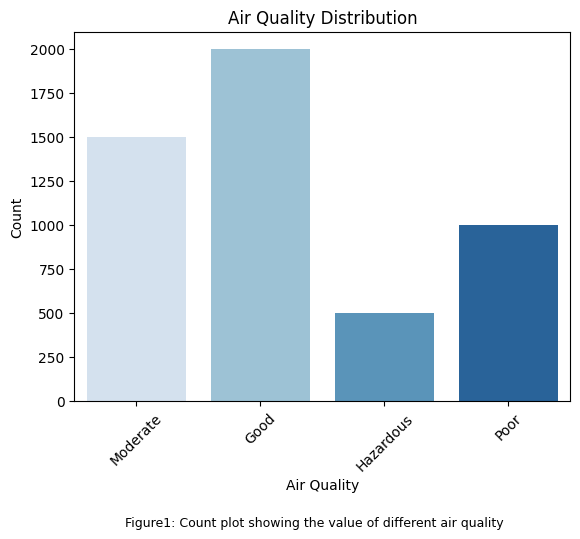

In [34]:
# plotting the value count of air quality
sns.countplot(x="Air Quality", data=df, palette="Blues")
plt.title("Air Quality Distribution")
plt.xlabel("Air Quality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.figtext(
    0.5, -0.15,
    "Figure1: Count plot showing the value of different air quality",
    ha="center",
    fontsize=9
)
plt.show()

from above figure we have plot the air quality in x axis and value counts at y axis. <br>
here 1500 are moderate, 2000 are good, 1000 are poor where as 250 are hazardous.


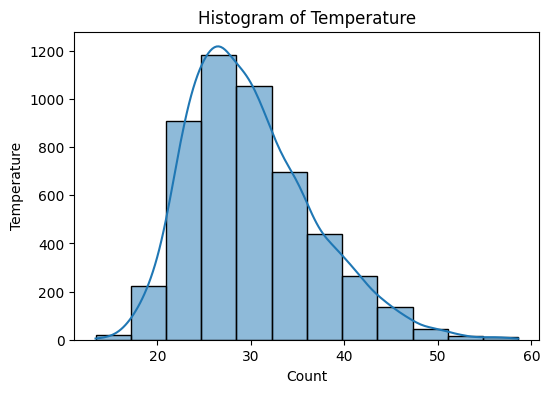

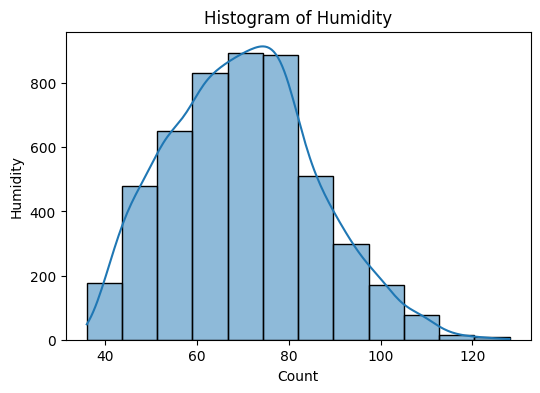

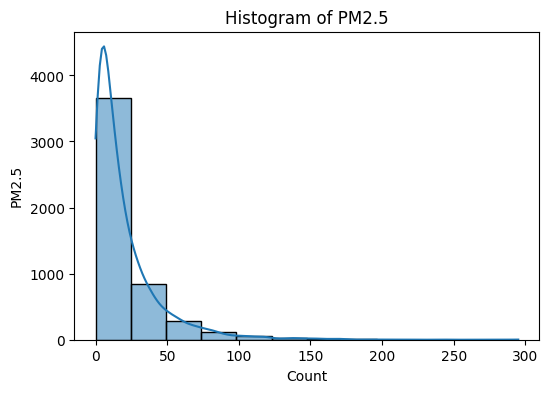

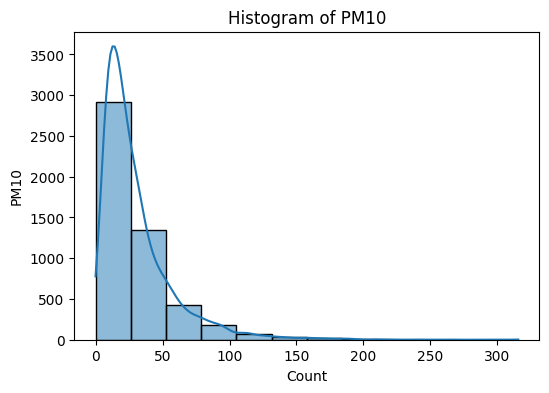

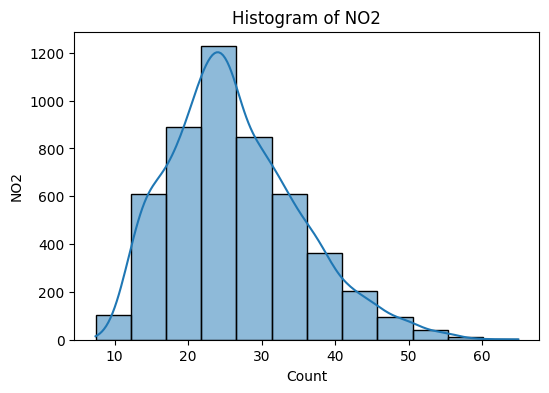

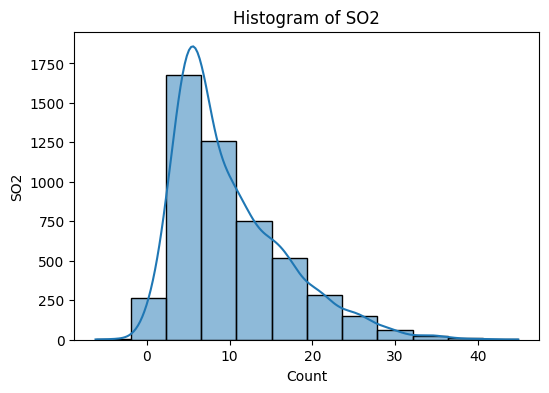

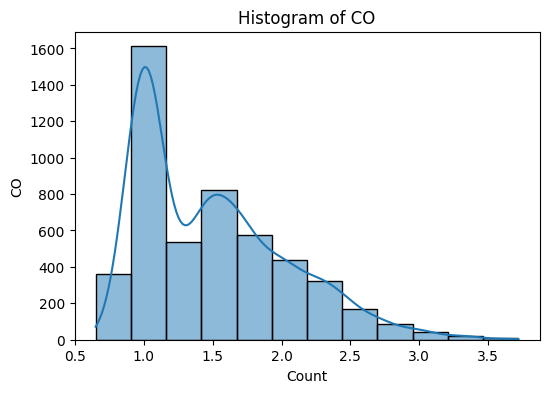

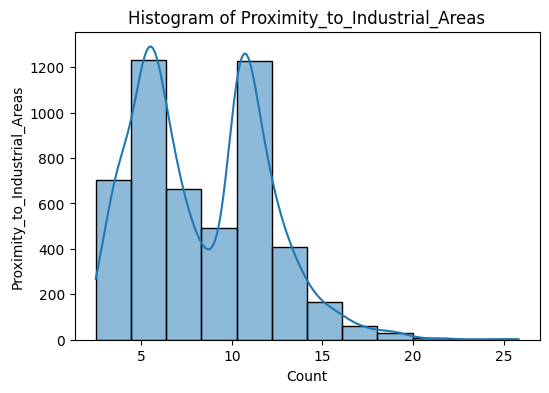

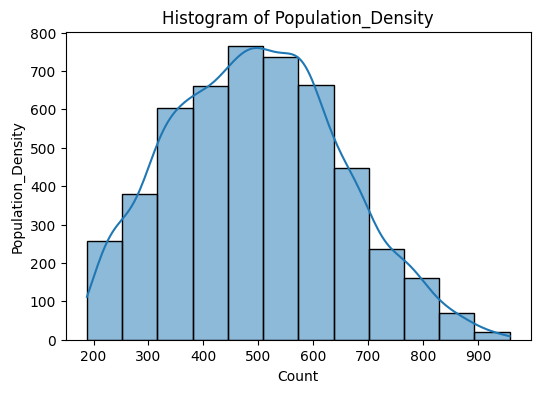

Text(0.5, -0.15, 'Figure2: Histograms')

<Figure size 640x480 with 0 Axes>

In [12]:

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot histograms in a simple loop for each columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
# kde= true gives a smooth line and bins=12 means range of value divided into 12 equal parts
    sns.histplot(df[col], kde=True, bins=12, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

plt.figtext(
    0.5, -0.15,
    "Figure2: Histograms",
    ha="center",
    fontsize=9
)

from above histogram is plotted. from above figure it clears the shape of data and identify the outliers. it display the data are symmetric, skew symmetric

In [13]:
#detecing outliers
# Simple outlier detection using IQR
outlier_counts = {}
cols= df.select_dtypes(include=['number']).columns

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count how many values are outside the bounds
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_counts[col] = len(outliers)

print("Outlier counts per column:\n", outlier_counts)

Outlier counts per column:
 {'Temperature': 72, 'Humidity': 19, 'PM2.5': 352, 'PM10': 323, 'NO2': 73, 'SO2': 124, 'CO': 45, 'Proximity_to_Industrial_Areas': 15, 'Population_Density': 7}


- Temperature: 72 outliers → 72 readings are unusually high or low compared to the rest.
- Humidity: 19 outliers → fewer extreme values, but still present.
- PM2.5: 352 outliers → very large number of extreme pollution readings.
- PM10: 323 outliers → similar, lots of extreme values.
- NO2: 73 outliers → moderate number of unusual readings.
- SO2: 124 outliers → significant number of extremes.
- CO: 45 outliers → some unusual values.
- Proximity_to_Industrial_Areas: 15 outliers → a few unusual entries.
- Population_Density: 7 outliers → very few unusual entries.


# Build a Primary Model  (Two Classical ML Models): <br>
i will use Logistic regression and random forest classifier

# Model 1: Logistic Regression

In [14]:
X= df.drop('Air Quality',axis=1).values
Y= df['Air Quality'].values

In [15]:
# trainning the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
print("X_train shape: ",X_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_train shape: ',Y_train.shape)
print("Y_test shape:",Y_test.shape)

X_train shape:  (4000, 9)
X_test shape:  (1000, 9)
Y_train shape:  (4000,)
Y_test shape: (1000,)


In [16]:
# scaling
scalar= StandardScaler()
X_train_scalar= scalar.fit_transform(X_train)
X_test_scalar= scalar.transform(X_test)

# here we perform scaling for classification
#scaling makes all the features in similar range. for example temp= 10-20, humidity= 15-30, pm2.5= 15-3000. the model will think the pm2.5 is most necessary feature becuase it has greater value
#if we do scaling nofeatures will dominates the model

#fit_transform() learn the data or parameters and apply it
#transform() only apply the data

In [17]:
from sklearn.linear_model import LogisticRegression
logistic_model= LogisticRegression(max_iter=5000,random_state=42)
# train the model
logistic_model.fit(X_train_scalar,Y_train)
# making predictions
y_train_pred=logistic_model.predict(X_train_scalar)
y_test_pred=logistic_model.predict(X_test_scalar)

#y_train_pred = ...	Predict labels for training data to check learning
#y_test_pred = ...	Predict labels for unseen test data to check generalization

In [42]:
# performing evaluation
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Evaluating Logistic regression: ")
print("Accuracy before hyperparameter tuning and feautre selection:", accuracy_score(Y_test, y_test_pred))
print("Precision:", precision_score(Y_test, y_test_pred, average='macro'))
print("Recall:", recall_score(Y_test, y_test_pred, average='macro'))
print("F1 Score:", f1_score(Y_test, y_test_pred, average='macro'))

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_test_pred))

#average='macro' calculates the metric for each class separately and then takes the average, treating all classes equally.
conf_matrix = confusion_matrix(Y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)


Evaluating Logistic regression: 
Accuracy before hyperparameter tuning and feautre selection: 0.946
Precision: 0.9271573289430433
Recall: 0.9151809808491836
F1 Score: 0.9203094033779986

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.92      0.82      0.87       111
    Moderate       0.95      0.96      0.96       294
        Poor       0.84      0.88      0.86       186

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000

Confusion Matrix:
 [[409   0   0   0]
 [  0  91   0  20]
 [  0   0 282  12]
 [  0   8  14 164]]


# Tunning hyperparameters for Model 1:

In [45]:
from sklearn.model_selection import GridSearchCV
parameters_grid = {
    'C':[0.0001,0.001,0.01,0.1,10,1000,10000],
    'penalty':['l2'],
   'solver':['liblinear','lbfgs']
}
# here c means hyper parameter it is also known as lambda
#penalty means which regularizaitionn we use we have used l2 means sum of squared weights
#solver means the algorithm Logistic Regression uses to optimize the model and find the best weights.

grid_Search= GridSearchCV(
    estimator=logistic_model,
    param_grid= parameters_grid,
    # cv= 5 means train on 4 and test on 1
    cv=5,
    scoring='precision_macro',
    # Use all CPU cores to run Grid Search faster
    n_jobs=-1,
    # Shows progress of Grid Search during execution
    verbose=1
)
# train the grid
grid_Search.fit(X_train_scalar,Y_train)
print("Best Parameters:",grid_Search.best_params_)
print("Best CV score: ",grid_Search.best_score_)

# return the model with best hyperparameter

best_model = grid_Search.best_estimator_
print(best_model)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score:  0.9218846086510852
LogisticRegression(C=0.1, max_iter=5000, random_state=42)


In [46]:
y_pred = best_model.predict(X_test_scalar)
print("Test Accuracy:", accuracy_score(Y_test, y_pred))


Test Accuracy: 0.939


Feature Selection using wrapper methods by using RFE

In [47]:
from sklearn.feature_selection import RFE
# re trainning the logistic model with optimized c value
log_reg_best = LogisticRegression(
    C=10,
    penalty='l2',
    solver='lbfgs',
    max_iter=5000,
    random_state=42
)

rfe = RFE(estimator=log_reg_best, n_features_to_select=5)

# Fit on training data
X_train_selected = rfe.fit_transform(X_train_scalar, Y_train)


X_test_selected = rfe.transform(X_test_scalar)

print("Selected Features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)


Selected Features: [False False  True  True  True False  True  True False]
Feature Ranking: [3 5 1 1 1 2 1 1 4]


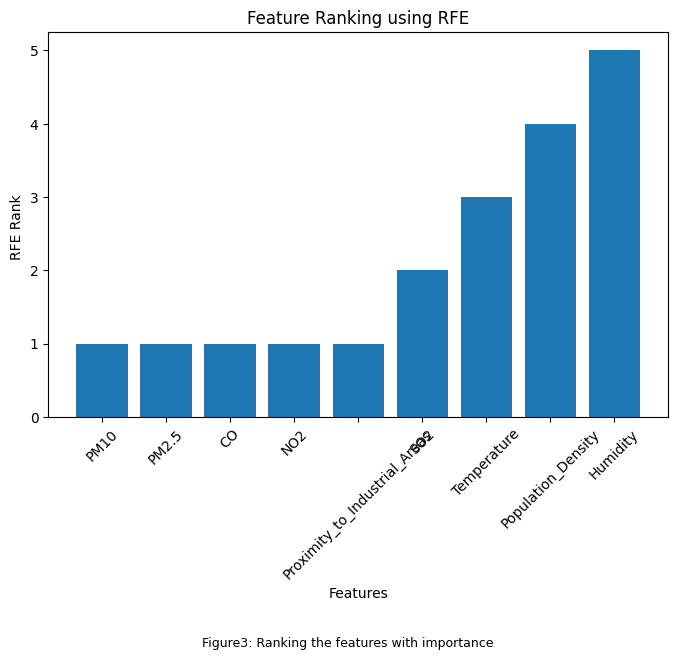

In [48]:
#plotting the ranking of the features
feature_names = df.drop('Air Quality', axis=1).columns
ranks = rfe.ranking_

feature_ranks = pd.DataFrame({
    'Feature': feature_names,
    'Rank': ranks
})

# Sort by importance
feature_ranks = feature_ranks.sort_values(by='Rank')
plt.figure(figsize=(8, 5))
plt.bar(feature_ranks['Feature'], feature_ranks['Rank'])
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("RFE Rank ")
plt.title("Feature Ranking using RFE")
plt.figtext(
    0.5, -0.35,
    "Figure3: Ranking the features with importance",
    ha="center",
    fontsize=9
)
plt.show()

from above figure it is clear that PM10 is ranked as most important where are pm2.5, so2 no2 co etc are ranked in order wise.

# Finally rebuilding the model


In [49]:
ReBuild_RFE= LogisticRegression(
    C=10,
    penalty='l2',
    solver='lbfgs',
    max_iter=5000,
    random_state=42


)
ReBuild_RFE.fit(X_train_selected,Y_train)
y_pred_rfe= ReBuild_RFE.predict(X_test_selected)


print("Accuracy after feature selection and hyper parameter tuning :", accuracy_score(Y_test, y_pred_rfe))
print("Precision:", precision_score(Y_test, y_pred_rfe, average='macro'))
print("Recall:", recall_score(Y_test, y_pred_rfe, average='macro'))
print("F1 Score:", f1_score(Y_test, y_pred_rfe, average='macro'))



Accuracy after feature selection and hyper parameter tuning : 0.923
Precision: 0.8962201153291031
Recall: 0.8820195734750736
F1 Score: 0.8880612564600688
